/var/folders/lv/7k9s2ljn2v3fcmq5jvtk6fbc0000gn/T/ipykernel_66275/490689350.py:11: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



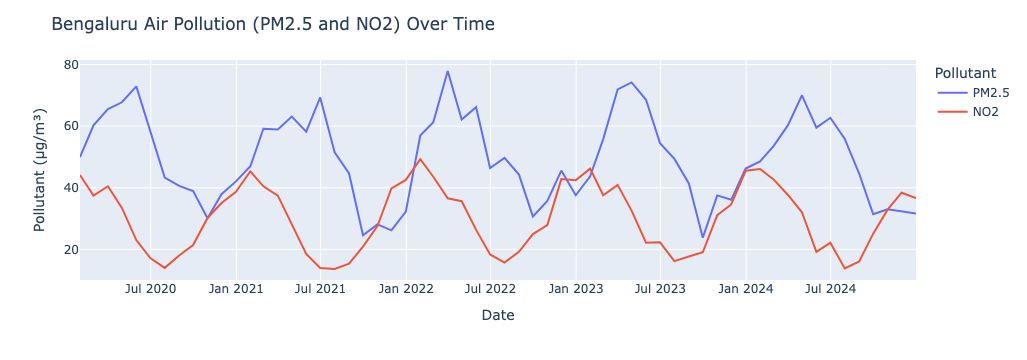

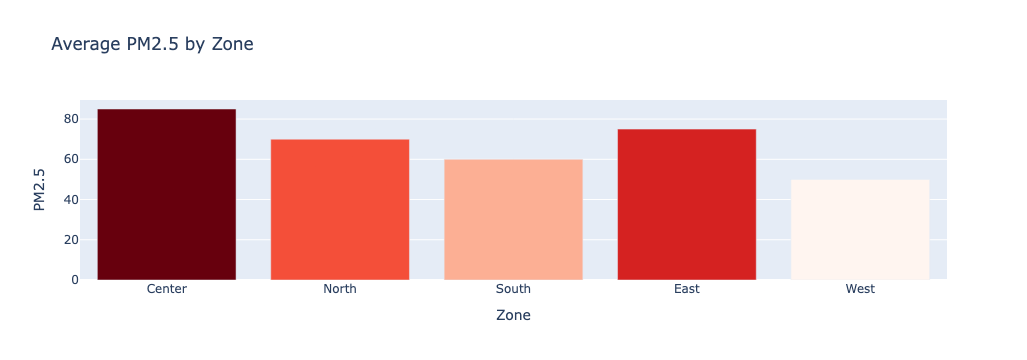

/var/folders/lv/7k9s2ljn2v3fcmq5jvtk6fbc0000gn/T/ipykernel_66275/490689350.py:46: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



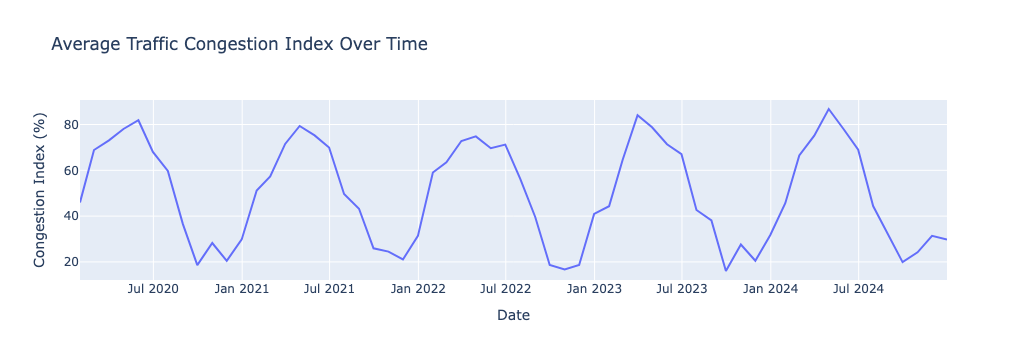

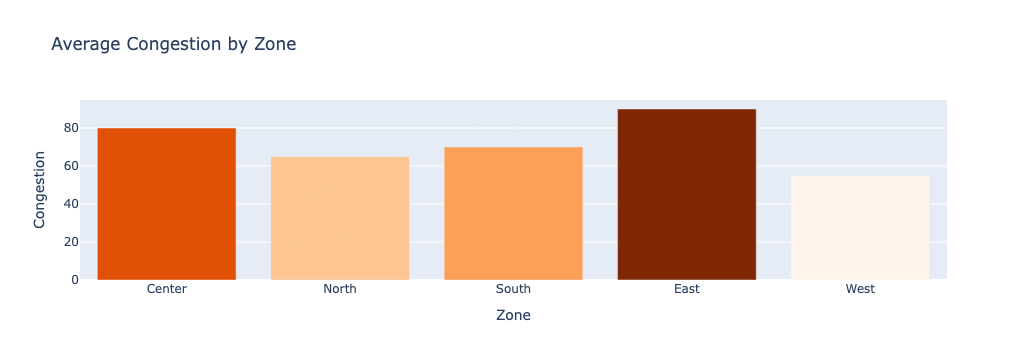

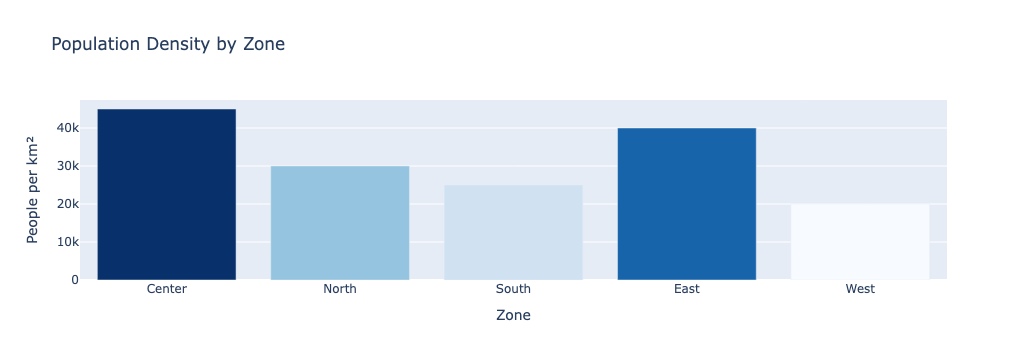

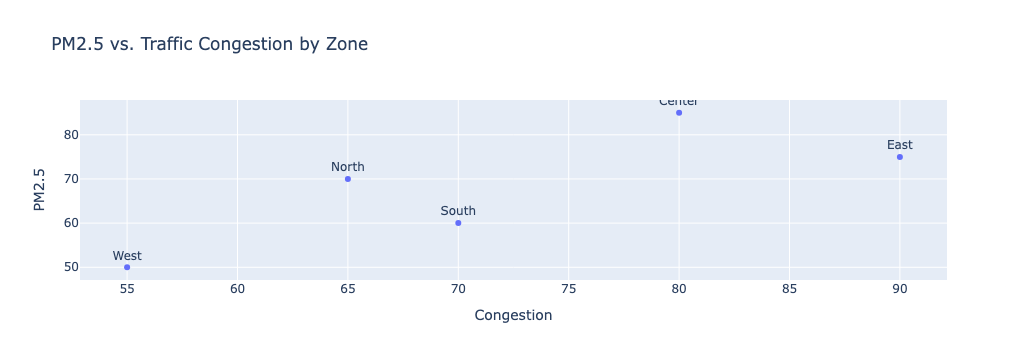

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/var/folders/lv/7k9s2ljn2v3fcmq5jvtk6fbc0000gn/T/ipykernel_66275/490689350.py:82: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



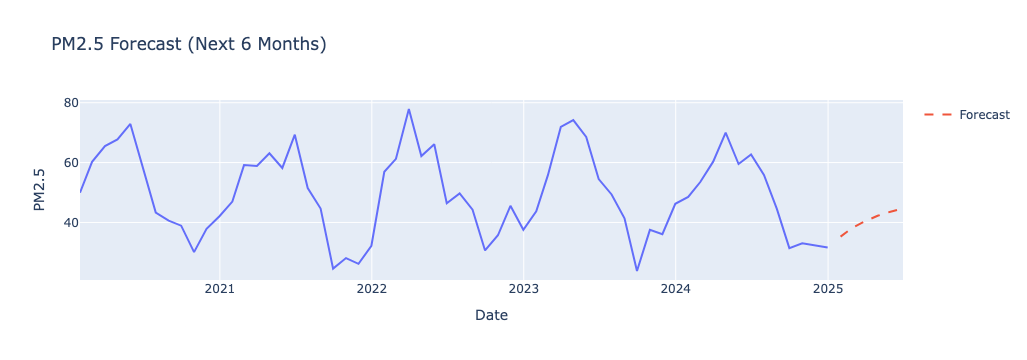

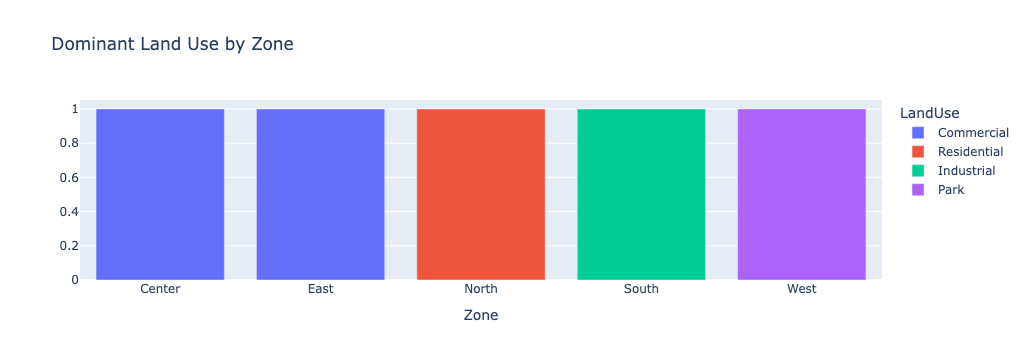

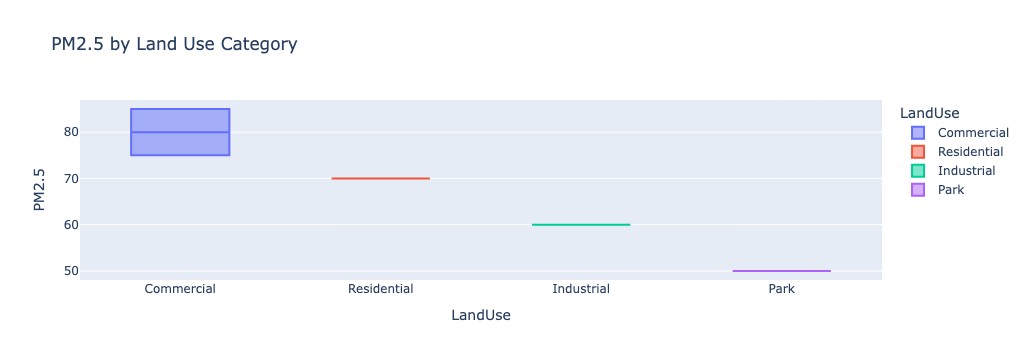

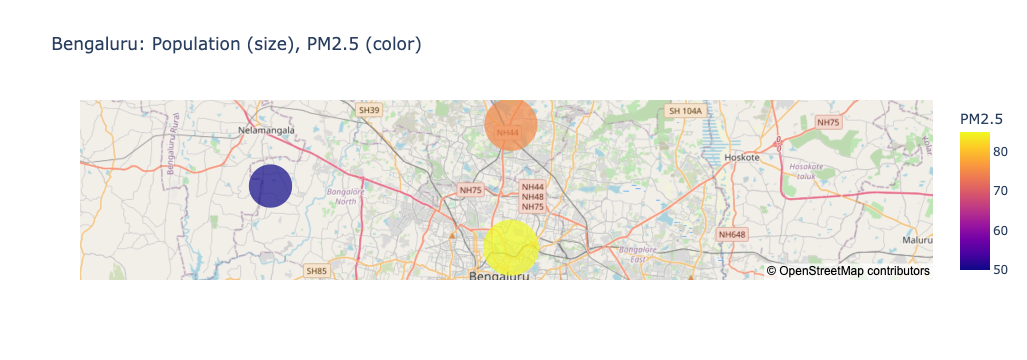

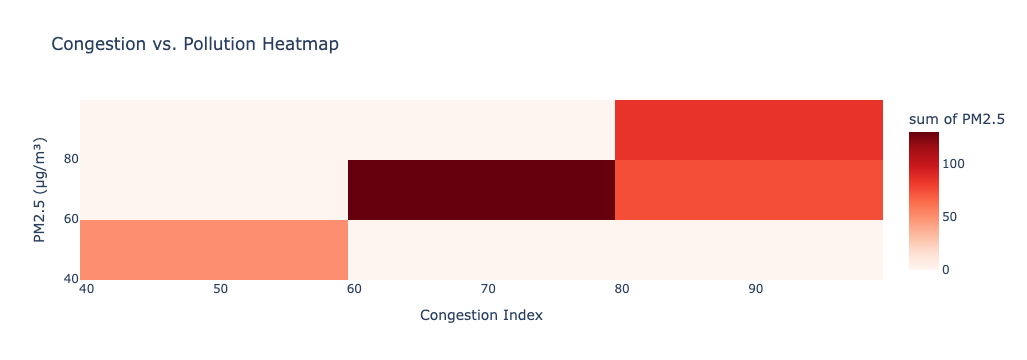

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
from statsmodels.tsa.arima.model import ARIMA


# Simulated data setup


# Pollution Time Series Data
dates = pd.date_range("2020-01-01", "2024-12-31", freq="M")
pm25 = 50 + 20 * np.sin(2 * np.pi * np.arange(len(dates)) / 12) + np.random.normal(0, 5, len(dates))
no2 = 30 + 15 * np.cos(2 * np.pi * np.arange(len(dates)) / 12) + np.random.normal(0, 3, len(dates))
pollution_df = pd.DataFrame({"Date": dates, "PM2.5": pm25, "NO2": no2})

# Zones and Static Data
zones = ["Center", "North", "South", "East", "West"]
zone_pm25 = [85, 70, 60, 75, 50]
zone_congestion = [80, 65, 70, 90, 55]
zone_pop_density = [45000, 30000, 25000, 40000, 20000]
zone_landuse = ["Commercial", "Residential", "Industrial", "Commercial", "Park"]
population_thousands = [100, 80, 70, 90, 60]

# Geo points for plotting (random lat/lon for demo purposes)
lats = [13.0, 13.2, 12.9, 13.1, 13.05]
lons = [77.6, 77.7, 77.5, 77.6, 77.4]


# Visualization 1: Time Series PM2.5 and NO2

fig1 = px.line(pollution_df, x="Date", y=["PM2.5", "NO2"], labels={"value": "Pollutant (µg/m³)", "variable": "Pollutant"})
fig1.update_layout(title="Bengaluru Air Pollution (PM2.5 and NO2) Over Time")
fig1.show()

# -----------------------------
# Visualization 2: PM2.5 by Zone
# -----------------------------
zone_df = pd.DataFrame({"Zone": zones, "PM2.5": zone_pm25})
fig2 = px.bar(zone_df, x="Zone", y="PM2.5", color="PM2.5", color_continuous_scale="Reds", title="Average PM2.5 by Zone")
fig2.update_layout(coloraxis_showscale=False)
fig2.show()

# -----------------------------
# Visualization 3: Congestion Time Series
# -----------------------------
days = pd.date_range("2020-01-01", "2024-12-31", freq="M")
congestion = 50 + 30 * np.sin(2 * np.pi * np.arange(len(days)) / 12) + np.random.normal(0, 5, len(days))
cong_df = pd.DataFrame({"Date": days, "CongestionIndex": congestion})
fig3 = px.line(cong_df, x="Date", y="CongestionIndex", title="Average Traffic Congestion Index Over Time")
fig3.update_yaxes(title_text="Congestion Index (%)")
fig3.show()

# -----------------------------
# Visualization 4: Congestion Heatmap (Bar substitute)
# -----------------------------
cong_zone_df = pd.DataFrame({"Zone": zones, "Congestion": zone_congestion})
fig4 = px.bar(cong_zone_df, x="Zone", y="Congestion", color="Congestion", color_continuous_scale="Oranges", title="Average Congestion by Zone")
fig4.update_layout(coloraxis_showscale=False)
fig4.show()

# -----------------------------
# Visualization 5: Population Density by Zone
# -----------------------------
pop_df = pd.DataFrame({"Zone": zones, "Density": zone_pop_density})
fig5 = px.bar(pop_df, x="Zone", y="Density", color="Density", color_continuous_scale="Blues", title="Population Density by Zone")
fig5.update_layout(coloraxis_showscale=False, yaxis_title="People per km²")
fig5.show()

# -----------------------------
# Visualization 6: PM2.5 vs Congestion
# -----------------------------
corr_df = pd.DataFrame({"Zone": zones, "PM2.5": zone_pm25, "Congestion": zone_congestion})
fig6 = px.scatter(corr_df, x="Congestion", y="PM2.5", text="Zone", title="PM2.5 vs. Traffic Congestion by Zone")
fig6.update_traces(textposition="top center")
fig6.show()

# -----------------------------
# Visualization 7: Forecast PM2.5
# -----------------------------
model = ARIMA(pollution_df["PM2.5"], order=(2, 1, 2)).fit()
forecast = model.forecast(steps=6)
forecast_dates = pd.date_range("2025-01-01", "2025-06-30", freq="M")
forecast_df = pd.DataFrame({"Date": forecast_dates, "PM2.5": forecast})
fig7 = px.line(pollution_df, x="Date", y="PM2.5", title="PM2.5 Forecast (Next 6 Months)")
fig7.add_scatter(x=forecast_df["Date"], y=forecast_df["PM2.5"], mode="lines", name="Forecast", line=dict(dash='dash'))
fig7.show()

# -----------------------------
# Visualization 8: Land Use by Zone
# -----------------------------
landuse_df = pd.DataFrame({"Zone": zones, "LandUse": zone_landuse})
fig8 = px.bar(landuse_df, x="Zone", y=[1]*5, color="LandUse", title="Dominant Land Use by Zone")
fig8.update_layout(showlegend=True, xaxis_title="Zone", yaxis_title="")
fig8.show()

# -----------------------------
# Visualization 9: PM2.5 by Land Use
# -----------------------------
corr_df["LandUse"] = zone_landuse
fig9 = px.box(corr_df, x="LandUse", y="PM2.5", color="LandUse", title="PM2.5 by Land Use Category")
fig9.show()

# -----------------------------
# Visualization 10: Composite Map (Pollution, Traffic, Population)
# -----------------------------
composite_df = pd.DataFrame({
    "Zone": zones,
    "Lat": lats,
    "Lon": lons,
    "PM2.5": zone_pm25,
    "Population": population_thousands
})
fig10 = px.scatter_mapbox(composite_df, lat="Lat", lon="Lon", size="Population", color="PM2.5", hover_name="Zone",
                          title="Bengaluru: Population (size), PM2.5 (color)", zoom=10, size_max=40)
fig10.update_layout(mapbox_style="open-street-map")
fig10.show()

# -----------------------------
# NEW: Visualization 11: Congestion and Pollution Heatmap
# -----------------------------

# Create a heatmap of traffic congestion vs. PM2.5 across zones
heatmap_df = pd.DataFrame({
    "Zone": zones,
    "Congestion": zone_congestion,
    "PM2.5": zone_pm25
})

fig11 = px.density_heatmap(heatmap_df, x="Congestion", y="PM2.5", z="PM2.5", color_continuous_scale="Reds",
                           title="Congestion vs. Pollution Heatmap")
fig11.update_layout(xaxis_title="Congestion Index", yaxis_title="PM2.5 (µg/m³)")
fig11.show()
